*Подключаем необходимые библиотеки*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

*Посмотрим на 3 случайных объекта в файле*

In [2]:
df = pd.read_csv("data/cars.csv", sep=',')
df.sample(3)

,price,year,mileage,tax,steering,condition,owners,model,volume,power,...,fuel consumption city/highway/combined,ecological,co2,engine capacity,boost type,cylinders,cylinder,compression,engine model,timing
3294,6 600 000 ₽,2025.0,10 км,9 850 ₽ / год,Левый,Не требует ремонта,NaN,LiXiang,1.5,449.0,...,-/-/7.4,NaN,NaN,1496.0,Турбонаддув,4.0,4.0,NaN,L2E15M,DOHC
5422,2 070 000 ₽,2018.0,125 000 км,37 800 ₽ / год,Левый,Не требует ремонта,NaN,BMW,2.0,252.0,...,7.8/5.2/6.2,Euro 6,144.0,1998.0,Турбонаддув,4.0,4.0,10.2,B48B20,DOHC
5244,1 350 000 ₽,2009.0,153 000 км,8 500 ₽ / год,Правый,Не требует ремонта,NaN,Mitsubishi,2.4,170.0,...,12.6/7.6/9.4,NaN,NaN,2349.0,нет,4.0,4.0,12.0,4B12,DOHC


In [3]:
df.shape

(11105, 39)

*Удалим дубликаты, если они есть*

In [4]:
df = df.drop_duplicates(keep="first")

In [5]:
df.shape

(4283, 39)

*Посмотрим, сколько различных значение содержатся в столбце engine model*

In [6]:
df["engine model"].value_counts()

engine model
L2E15M              68
mr20de              44
m 270 de 20 al      43
B57D30              32
B48B20              31
                    ..
FA24F                1
R06A                 1
OM602.939            1
Z12XER               1
2.0L DI Atkinson     1
Name: count, Length: 814, dtype: int64

*В нём 313 различных значений, слишком много, если потом использовать OneHotEncoding, поэтому удалим данный столбец*

In [7]:
df = df.drop("engine model", axis=1)

*Посмотрим, какие значения принимает столбец "Состояние машины"*

In [8]:
df["condition"].value_counts()

condition
Не требует ремонта    4282
Name: count, dtype: int64

*Все значения одинаковые, поэтому удалим его*

In [9]:
df = df.drop("condition", axis=1)

In [10]:
df.head(3)

,price,year,mileage,tax,steering,owners,model,volume,power,transmission,...,maximum speed,fuel consumption city/highway/combined,ecological,co2,engine capacity,boost type,cylinders,cylinder,compression,timing
0,450 000 ₽,2010.0,100 000 км,1 485 ₽ / год,Левый,3 или более,Hyundai,1.1,66.0,Механика,...,154.0,6.9/4.7/5.5,NaN,NaN,1086.0,нет,4.0,3.0,10.0,SOHC
1,2 000 000 ₽,2018.0,75 000 км,2 228 ₽ / год,Правый,1 владелец,NaN,1.0,99.0,Автомат,...,NaN,6.7/5.6/5.9,NaN,137.0,996.0,Турбонаддув,3.0,4.0,10.0,DOHC
2,1 630 000 ₽,2017.0,43 000 км,3 623 ₽ / год,Правый,1 владелец,Subaru,1.6,115.0,Вариатор,...,NaN,-/-/5.5,NaN,NaN,1599.0,нет,4.0,4.0,11.0,DOHC


*Посмотрим на типы данных в столбцах*

In [11]:
df.dtypes

price                                      object
year                                      float64
mileage                                    object
tax                                        object
steering                                   object
owners                                     object
model                                      object
volume                                    float64
power                                     float64
transmission                               object
engine                                     object
fuel                                       object
drive                                      object
acceleration                              float64
consumption                               float64
country                                    object
class                                      object
number seats                               object
length                                    float64
width                                     float64


*Напишем функцию, которая очистит значение от букв и переведёт object в float64, применим её для некоторых столбцов*

In [12]:
def to_float(x):
    result = ''
    if (pd.isna(x)):
        return np.nan
    for i in x:
        if (i.isdigit() or i == '.'):
            result += str(i)
    return float(result.replace("..", '.'))

colums_to_float = ["price", "mileage", "tax", "owners", "clearance"]

for col in colums_to_float:
    df[col] = df[col].apply(to_float)

*Если есть несколько значений для количества мест, то возьмём первое*

In [13]:
df["number seats"] = df["number seats"].apply(lambda x: x.split(',')[0] if (not pd.isna(x)) else np.nan).astype("float64")

*Преобразуем значение для размера колёс*

In [14]:
df["wheel size"] = df["wheel size"].apply(lambda x: x.split(' ')[-1] if (not pd.isna(x)) else np.nan)

*Разделим один столбец на три отдельных по расходу топлива и удалим изначальный*

In [15]:
df[["fuel consumption city", "fuel consumption highway", "fuel consumption combined"]] = df["fuel consumption city/highway/combined"].str.split('/', expand=True).replace('-', np.nan).astype("float64")
df = df.drop("fuel consumption city/highway/combined", axis=1)

*Если экологический класс не указан, то создадим свой*

In [16]:
df["ecological"] = df["ecological"].fillna("Euro 0")

*Если количество владельцев не указано, то будем считать, что их не было*

In [17]:
df["owners"] = df["owners"].fillna(0)

*Посмотрим, как изменились типы данных в столбцах*

In [18]:
df.dtypes

price                        float64
year                         float64
mileage                      float64
tax                          float64
steering                      object
owners                       float64
model                         object
volume                       float64
power                        float64
transmission                  object
engine                        object
fuel                          object
drive                         object
acceleration                 float64
consumption                  float64
country                       object
class                         object
number seats                 float64
length                       float64
width                        float64
height                       float64
wheelbase                    float64
clearance                    float64
wheel size                    object
fuel capacity                float64
weight                       float64
gears                        float64
m

In [19]:
df.sample(5)

,price,year,mileage,tax,steering,owners,model,volume,power,transmission,...,co2,engine capacity,boost type,cylinders,cylinder,compression,timing,fuel consumption city,fuel consumption highway,fuel consumption combined
7042,1350000.0,2014.0,233500.0,8550.0,Левый,1.0,Nissan,2.5,171.0,Вариатор,...,192.0,2488.0,нет,4.0,4.0,10.0,DOHC,11.3,6.6,8.3
6656,1350000.0,2009.0,300000.0,39000.0,Левый,3.0,BMW,3.0,264.0,Автомат,...,NaN,2996.0,нет,6.0,4.0,10.7,DOHC,15.7,11.2,13.1
10123,910000.0,2013.0,295000.0,5250.0,Левый,3.0,Hyundai,2.0,150.0,Автомат,...,184.0,1999.0,нет,4.0,4.0,10.3,DOHC,10.6,6.1,7.8
6795,455000.0,2012.0,295000.0,3710.0,Левый,2.0,Renault,1.6,106.0,Автомат,...,180.0,1598.0,нет,4.0,4.0,9.7,DOHC,10.6,5.8,7.5
827,1050000.0,2007.0,170000.0,40800.0,Левый,3.0,BMW,3.0,272.0,Автомат,...,NaN,2996.0,нет,6.0,4.0,10.7,DOHC,16.0,9.2,11.7


*Посмотрим в каких столбцах больше всего пропусков*

In [20]:
df.isna().mean().sort_values(ascending=False)

co2                          0.505954
weight                       0.140789
fuel consumption city        0.133084
fuel consumption highway     0.130749
gears                        0.123979
model                        0.070745
compression                  0.067710
maximum speed                0.055802
acceleration                 0.054401
wheel size                   0.044828
fuel consumption combined    0.040392
clearance                    0.034555
fuel capacity                0.028251
fuel                         0.025216
consumption                  0.024749
timing                       0.022648
boost type                   0.020780
cylinder                     0.020313
engine capacity              0.020313
cylinders                    0.020313
volume                       0.020313
tax                          0.013775
class                        0.002802
transmission                 0.002335
engine                       0.002335
width                        0.002335
length      

*Создадим два списка, в которых будут отдельно находиться названия столбцов с типом object и float64*

In [21]:
columns_obj = [i for i in df.columns if (df[i].dtype == "object")]
columns_num = [i for i in df.columns if (i not in columns_obj)]

*Построим гистограмму цен, но чтобы график выглядел понятнее возьмём логарифм от цен*

In [22]:
df["log_price"] = np.log1p(df["price"])

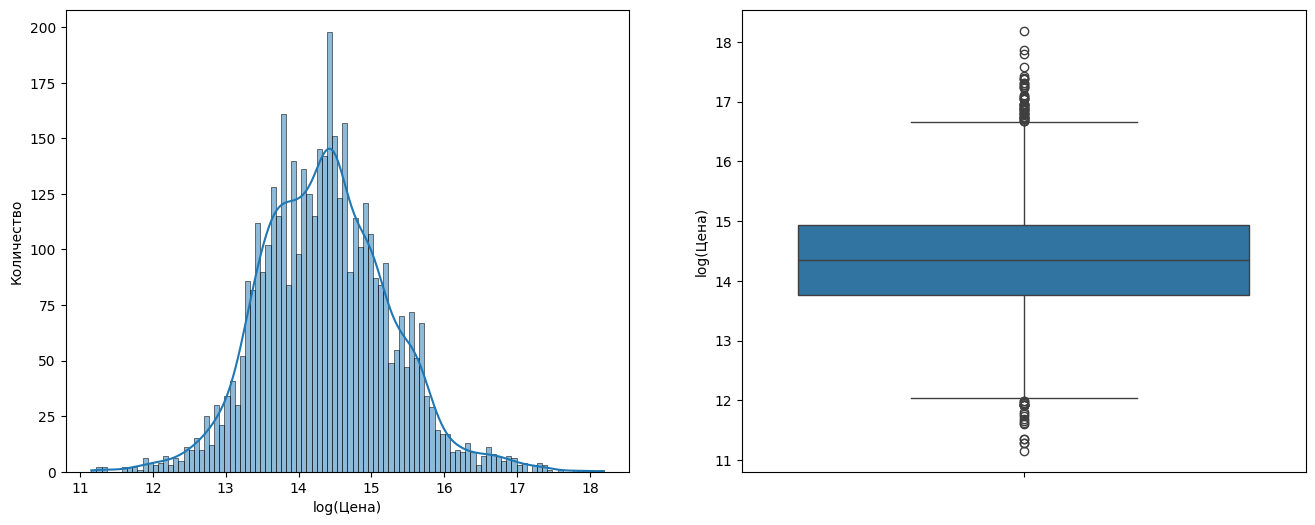

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df["log_price"], bins=100, kde=True, ax=ax[0])
ax[0].set_xlabel("log(Цена)")
ax[0].set_ylabel("Количество")

sns.boxplot(df["log_price"], ax=ax[1])
ax[1].set_ylabel("log(Цена)")

plt.show()

*Построим гистограммы по столбцам object*

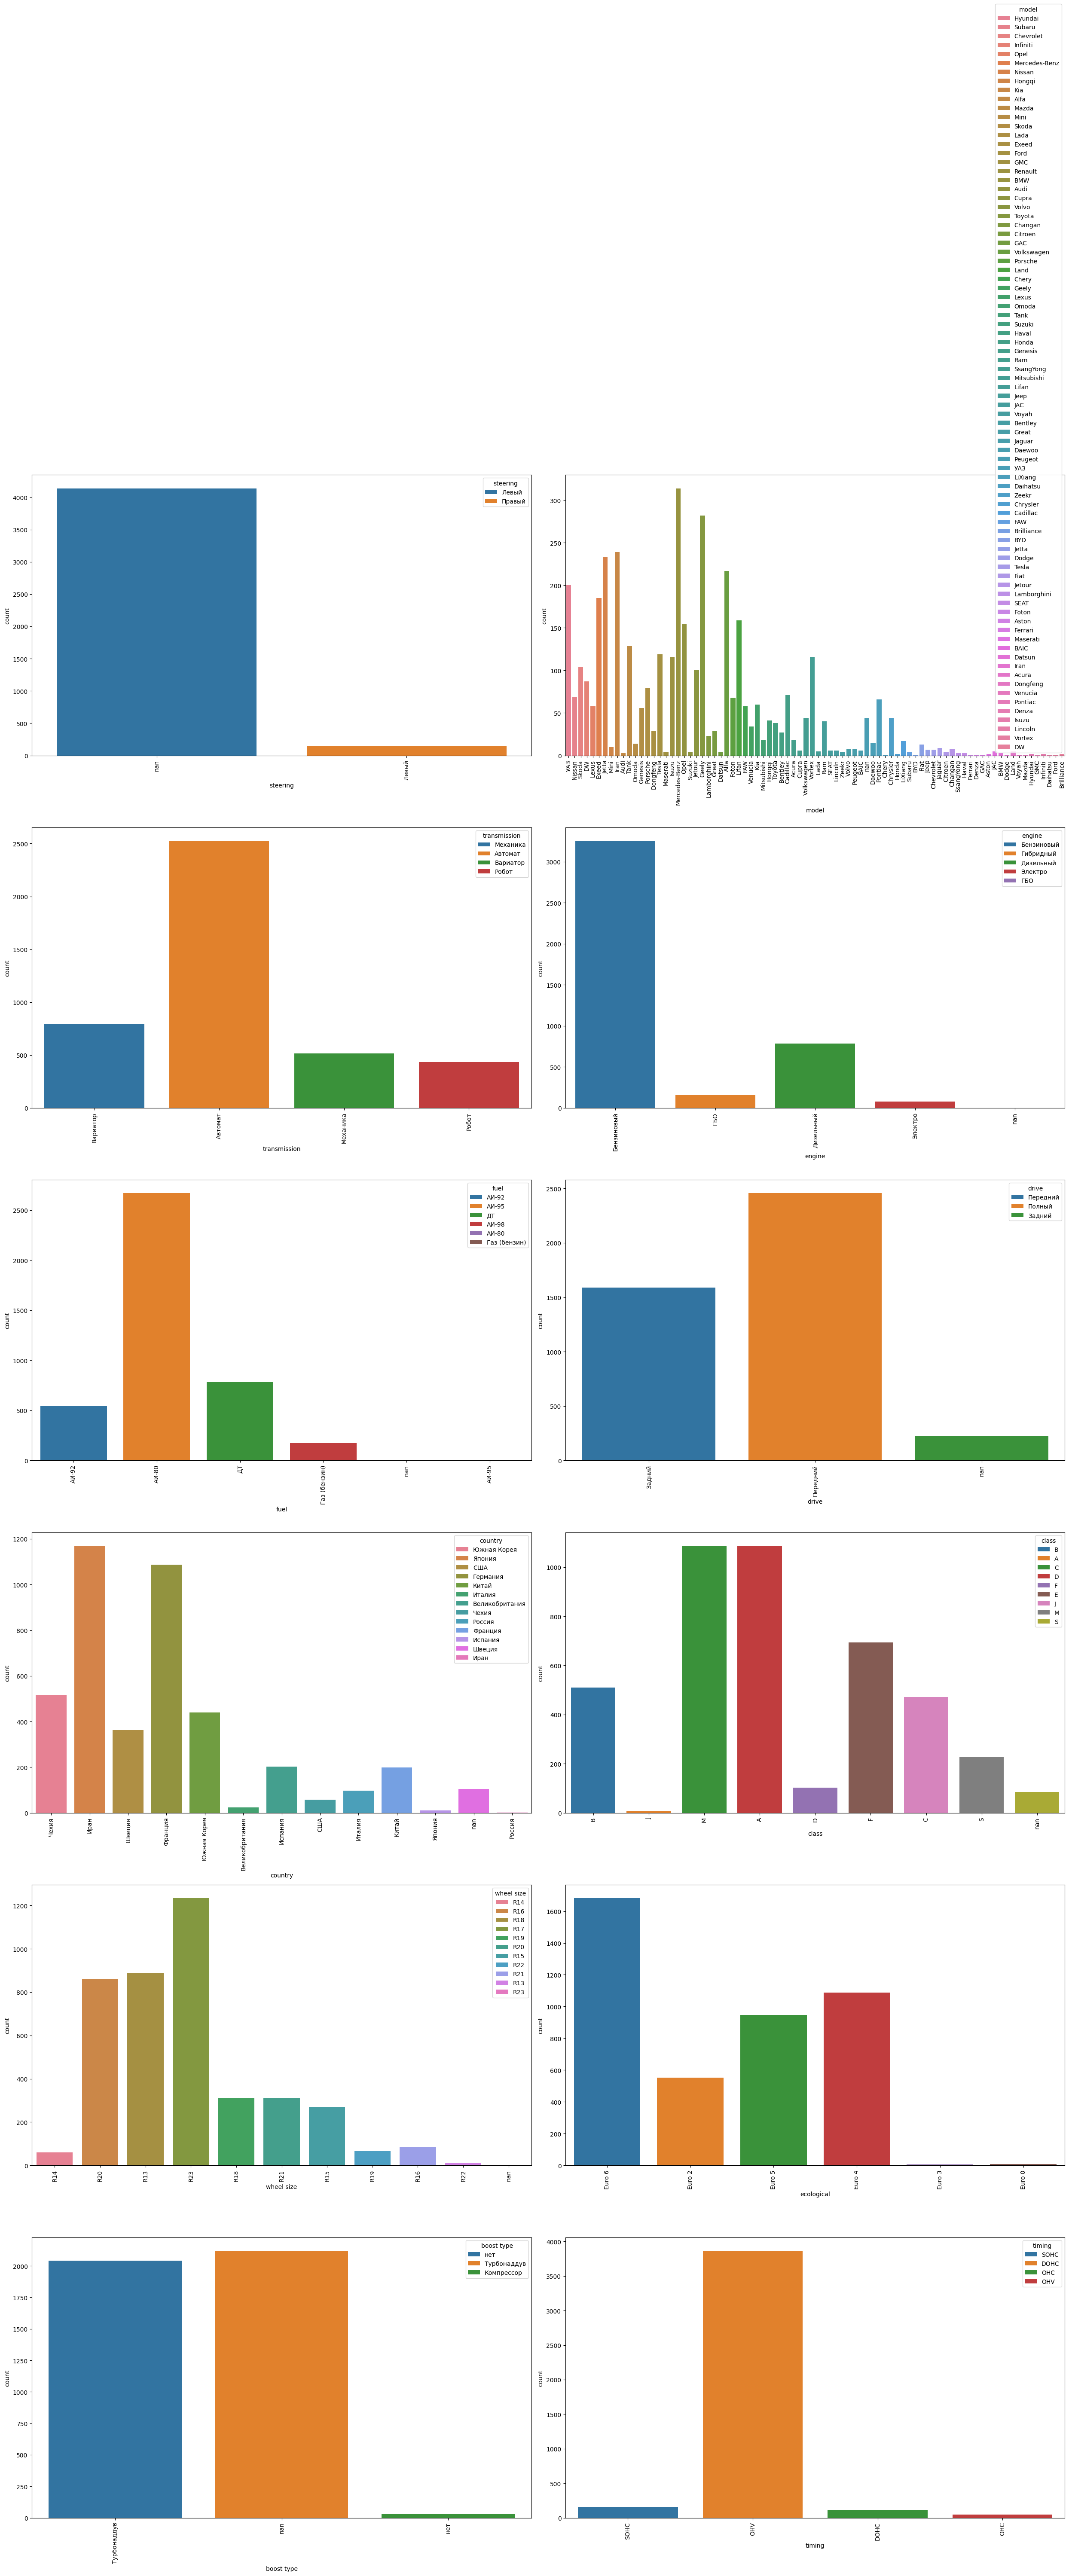

In [24]:
fig, ax = plt.subplots(6, 2, figsize=(25, 60))
for i in range(6):
    for j in range(2):
        sns.countplot(df, x=columns_obj[2 * i + j], hue=columns_obj[2 * i + j], ax=ax[i, j])
        ax[i, j].set_xticklabels(set(df[columns_obj[2 * i + j]].values), rotation=90)
        
plt.tight_layout()
plt.show()

* *Можно попробовать удалить столбец timing, так как большая часть объектов принимает значение "DOHC"*
* *Можно удалить boost type, так как практически половина имеет NaN-значение, а другая "Компрессор"*

In [25]:
df = df.drop(["timing", "boost type"], axis=1)

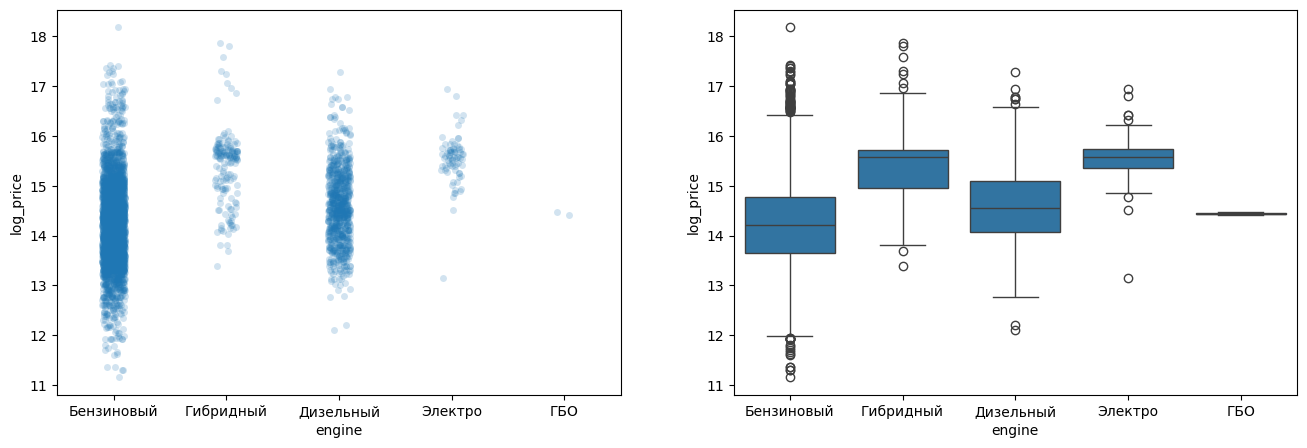

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.stripplot(x="engine", y="log_price", data=df, jitter=True, alpha=0.2, ax=ax[0])
sns.boxplot(x="engine", y="log_price", data=df, ax=ax[1])

plt.show()

*Сделаем вывод, что больший всего разброс цен у машин на бензине*

<Figure size 1000x600 with 0 Axes>

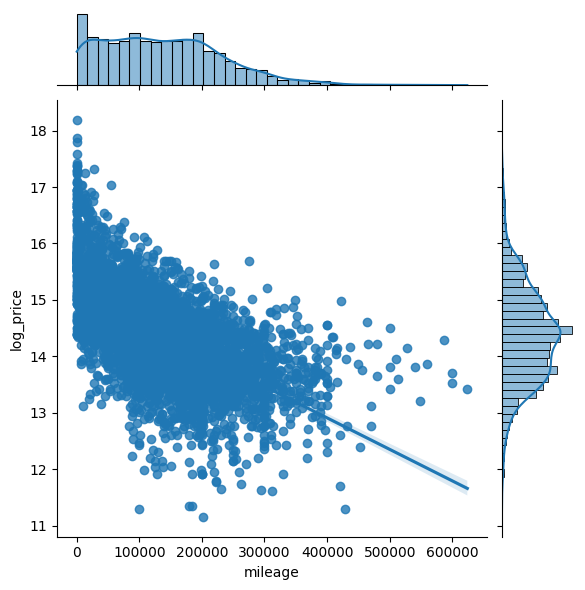

In [27]:
plt.figure(figsize=(10, 6))
sns.jointplot(x="mileage", y="log_price", data=df, kind="reg")

plt.show()

*Можно заметить, что цена, как ожидается, будет убывать при увеличении пробега автомобиля*

*Сохраним данные*

In [28]:
df.to_csv("data/cars_ml.csv", index=False)